# Data Analysis

The aim of this Capstone project is to consolidate the knowledge, skills and competences acquired by learners during this programme. In this project students will select, specify, design, justify and implement a data analytics investigation that makes use of large data sets. The project will necessarily require data ingestion, wrangling, computation and analyses, and the production and presentation of a project and report. Students are guided by faculty in the selection of a data set, scope of investigation, initial exploratory data analysis, and formulation of hypotheses.

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import ast
import re

In [2]:
deck_df = pd.read_csv("data/data_decks_cleaned.csv")

Lets see if we can plot anything

In [3]:
%matplotlib inline

In [4]:
deck_df.head()

,deck_id,deck_name,deck_wins,deck_losses,deck_expansion,house_brobnar,house_dis,house_sanctum,house_mars,house_untamed,...,Zyzzix the Many,REDACTED,Æmber Conduction Unit,Æmber Imp,Æmberspine Mongrel,“John Smyth”,“Lion” Bautrem,score,expansion_coa,expansion_aoa
0,6216e565-a790-4e5b-b89a-4a814917b94e,"Leif “As”, Granjera de la Alcantarilla",2,1,435,True,True,True,False,False,...,0,0,0,0,0,0,0,1,True,False
1,50e28cdd-6e6b-4584-a8d1-1f22c081e906,"“Ivan” Valencia, Ship Chieftain",1,3,435,True,False,True,False,True,...,0,0,0,0,0,0,0,-2,True,False
2,3969e139-05d7-4a8a-ba60-0bb660cd057b,"Nasir, Canal Survivalist",2,1,435,True,False,True,True,False,...,0,0,0,0,0,0,1,1,True,False
3,5668bdc3-dea4-4226-92ba-91b003a5460e,"Destrolack, Observatory Recluse",4,4,435,False,False,True,False,True,...,0,0,0,0,0,0,0,0,True,False
4,749780f6-7acb-402a-9fd6-f6fbbcf888e1,"Tiberius, Navigatore della Guglia Aperta",8,4,341,False,False,False,True,True,...,1,0,0,0,0,1,0,4,False,True


In [5]:
deck_df.describe()

,deck_wins,deck_losses,deck_expansion,1-2 Punch,A Fair Game,Abond the Armorsmith,Agent Hoo-man,Ammonia Clouds,Anahita the Trader,Ancient Bear,...,Zorg,Zysysyx Shockworm,Zyzzix the Many,REDACTED,Æmber Conduction Unit,Æmber Imp,Æmberspine Mongrel,“John Smyth”,“Lion” Bautrem,score
count,67321.000000,67321.000000,67321.000000,67321.000000,67321.000000,67321.000000,67321.000000,67321.000000,67321.000000,67321.000000,...,67321.000000,67321.000000,67321.000000,67321.000000,67321.000000,67321.000000,67321.000000,67321.000000,67321.000000,67321.000000
mean,2.520833,2.340949,373.913474,0.066294,0.025638,0.070513,0.066606,0.103593,0.007977,0.139615,...,0.064660,0.068909,0.115061,0.010101,0.023633,0.073424,0.028253,0.123127,0.075638,0.179884
std,2.452996,1.786724,44.839711,0.298569,0.160109,0.309012,0.300557,0.368056,0.089952,0.434456,...,0.266174,0.305654,0.393665,0.103355,0.164938,0.311640,0.179880,0.411228,0.321604,2.468806
min,0.000000,0.000000,341.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-33.000000
25%,1.000000,1.000000,341.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
50%,2.000000,2.000000,341.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,3.000000,435.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,40.000000,39.000000,435.000000,4.000000,2.000000,4.000000,4.000000,4.000000,2.000000,4.000000,...,3.000000,4.000000,4.000000,2.000000,3.000000,4.000000,3.000000,5.000000,4.000000,26.000000


In [6]:
decks = deck_df[['deck_wins','deck_losses', 'score', 'expansion_coa']]
decks.head()

,deck_wins,deck_losses,score,expansion_coa,expansion_aoa
0,2,1,1,True,False
1,1,3,-2,True,False
2,2,1,1,True,False
3,4,4,0,True,False
4,8,4,4,False,True


In [7]:
deck_exp = decks.groupby('expansion_coa')
deck_exp.size()

expansion_coa
False    43749
True     23572
dtype: int64

In [8]:
deck_exp_totals = deck_exp.sum()
deck_exp_totals.head()

,deck_wins,deck_losses,score,expansion_aoa
expansion_coa,,,,
False,118512,106001,12511,43749.0
True,51193,51594,-401,0.0


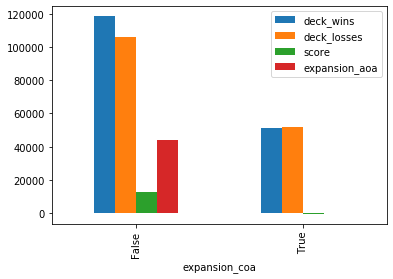

In [9]:
my_plot = deck_exp_totals.plot(kind='bar')

In [10]:
deck_df.head()

,deck_id,deck_name,deck_wins,deck_losses,deck_expansion,house_brobnar,house_dis,house_sanctum,house_mars,house_untamed,...,Zyzzix the Many,REDACTED,Æmber Conduction Unit,Æmber Imp,Æmberspine Mongrel,“John Smyth”,“Lion” Bautrem,score,expansion_coa,expansion_aoa
0,6216e565-a790-4e5b-b89a-4a814917b94e,"Leif “As”, Granjera de la Alcantarilla",2,1,435,True,True,True,False,False,...,0,0,0,0,0,0,0,1,True,False
1,50e28cdd-6e6b-4584-a8d1-1f22c081e906,"“Ivan” Valencia, Ship Chieftain",1,3,435,True,False,True,False,True,...,0,0,0,0,0,0,0,-2,True,False
2,3969e139-05d7-4a8a-ba60-0bb660cd057b,"Nasir, Canal Survivalist",2,1,435,True,False,True,True,False,...,0,0,0,0,0,0,1,1,True,False
3,5668bdc3-dea4-4226-92ba-91b003a5460e,"Destrolack, Observatory Recluse",4,4,435,False,False,True,False,True,...,0,0,0,0,0,0,0,0,True,False
4,749780f6-7acb-402a-9fd6-f6fbbcf888e1,"Tiberius, Navigatore della Guglia Aperta",8,4,341,False,False,False,True,True,...,1,0,0,0,0,1,0,4,False,True


---------------------

Guide for random forests used here: https://www.datacamp.com/community/tutorials/random-forests-classifier-python

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
from sklearn.ensemble import RandomForestClassifier

In [13]:
clf=RandomForestClassifier(n_estimators=100)

In [14]:
x = deck_df
x = x.drop("deck_id", axis=1)
x = x.drop("deck_name", axis=1)
x = x.drop("deck_wins", axis=1)
x = x.drop("deck_losses", axis=1)
x = x.drop("score", axis=1)
y = deck_df[['score']]

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3) # 70% training and 30% test

In [16]:
clf.fit(x_train, y_train.values.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

get a regression value - r square version. 

In [17]:
y_pred=clf.predict(x_test)

In [18]:
from sklearn import metrics
print("Accuracy:",metrics.r2_score(y_test, y_pred))

Accuracy: -0.11619911880622902


try a few different models to see what would work - neural net? might try something online.


In [19]:
feature_imp = pd.Series(clf.feature_importances_,index=x.columns).sort_values(ascending=False)
feature_imp

Mother                   0.006590
Labwork                  0.005905
Dust Imp                 0.005469
Shooler                  0.005459
Charette                 0.005361
Wild Wormhole            0.005149
Punch                    0.004982
Titan Mechanic           0.004915
Umbra                    0.004812
Miasma                   0.004741
Nerve Blast              0.004721
Regrowth                 0.004682
Ganger Chieftain         0.004653
Library of Babble        0.004600
Bad Penny                0.004570
Blinding Light           0.004524
Full Moon                0.004518
Gauntlet of Command      0.004440
Shield of Justice        0.004402
Protect the Weak         0.004380
Take Hostages            0.004275
Save the Pack            0.004147
Tremor                   0.004097
Lash of Broken Dreams    0.004077
Coward’s End             0.004041
Yxilx Dominator          0.004032
Mindwarper               0.004020
Niffle Ape               0.003965
Urchin                   0.003941
Vezyma Thinkdr

---------

Instead of looking at all the cards, lets try a simplier model using just the houses

In [20]:
x = deck_df[['house_brobnar','house_dis','house_sanctum','house_mars','house_untamed','house_shadows', 'house_logos']]
y = deck_df[['score']]

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3) # 70% training and 30% test
clf.fit(x_train, y_train.values.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [22]:
y_pred=clf.predict(x_test)

In [23]:
print("Accuracy:",metrics.r2_score(y_test, y_pred))

Accuracy: -0.11733393140568982


In [24]:
feature_imp = pd.Series(clf.feature_importances_,index=x.columns).sort_values(ascending=False)
feature_imp

house_shadows    0.393209
house_mars       0.133904
house_brobnar    0.098704
house_sanctum    0.098123
house_dis        0.094521
house_logos      0.093353
house_untamed    0.088185
dtype: float64

No handles with labels found to put in legend.


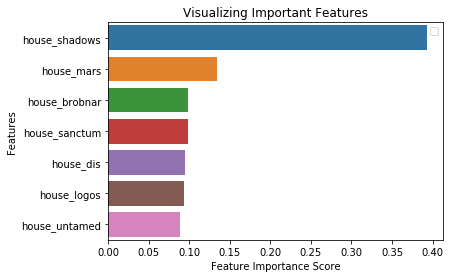

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

Despite the poor predictive performance, the model has indicated the shadows house is the most important feature which matches the experience of players of the game.

Lets try a simple GLM

In [27]:
X = deck_df.drop(['deck_id', 'deck_name', 'deck_wins', 'deck_losses', 'score',
                  'house_shadows', 'house_mars', 'house_untamed',
                  'house_logos', 'house_dis', 'house_sanctum',
                  'house_brobnar', 'deck_expansion', 'expansion_coa',
                  'expansion_aoa'], axis=1)
y = deck_df[['score']]

In [28]:
from sklearn import linear_model

In [29]:
lm = linear_model.LinearRegression()
model = lm.fit(X,y)

In [30]:
predictions = lm.predict(X)
print(predictions)

[[-0.46853113]
 [-0.15852094]
 [ 0.56536913]
 ...
 [ 1.02344751]
 [-1.12119007]
 [-1.51481128]]


In [31]:
lm.score(X,y)

0.11821184764333414

In [32]:
coefDF = pd.DataFrame({'feature':X.columns, 'coef':lm.coef_[0]})

In [33]:
coefDF.sort_values(by=['coef'], ascending=False)

,feature,coef
214,Horseman of Pestilence,1.552159e+12
510,Timetraveller,6.127605e+11
19,Bait and Switch,3.446623e+07
278,Martian Generosity,3.446623e+07
393,Relentless Whispers,3.446623e+07
311,Nature’s Call,3.446623e+07
144,Finishing Blow,3.446623e+07
218,Hypnotic Command,3.446623e+07
372,Proclamation 346E,3.446623e+07
258,Lights Out,3.446623e+07


Despite the poor performance of the overall model, the list of coefficients does reflect the accepted wisdom of the player base.

Here is an article which lists the following cards as the top 10:
https://hobbylark.com/card-games/best-keyforge-cards

- 01 Routine Job - Our rating 12th
- 02 Finishing Blow - Our rating 7th
- 03 Relentless Whispers - Our rating 5th
- 04 Bait and Switch - Our rating 3rd
- 05 Faygin - Our rating ?? outside the visible top
- 06 Lights Out - Our rating 10th
- 07 Urchin - Our rating ?? outside the visible top
- 08 Nerve Blast - Our rating 27th 
- 09 Timetraveller - Our rating 2nd
- 10 Help From Future Self - Our rating ?? outside the visible top

This is pretty good given that there are 582 cards to rate!

In [34]:
import pickle
filename = 'finalized_linear_model.sav'
pickle.dump(lm, open(filename, 'wb'))